In [ ]:
'''

2. Diabetes Prediction
Dataset: https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Tasks
 Check missing values, outliers
 Normalize features using StandardScaler
 Build Decision Tree
 Evaluate using precision, recall
 Plot feature importance


'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('diabetes.csv')  ## load the dataset

In [3]:
df  ## show the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
## check glucode == 0 is here or not in glucose column
z = df[df['Glucose']==0]
print(z)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  


In [5]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())  ## where glucose == 0, replace median of glucose column

In [6]:
df[df['BloodPressure']==0]  ## check blood presure == 0 is here or not in blood presure column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [7]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())  ## where BloodPressure == 0, replace median of BloodPressure column

In [8]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())  ## where SkinThickness == 0, replace median of SkinThickness column

In [9]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())  ## where Insulin == 0, replace median of Insulin column

In [10]:
df[df['BMI']==0]  ## check BMI == 0 is here or not in BMI column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [11]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())  ## where BMI == 0, replace median of BMI column

In [12]:
df[df['DiabetesPedigreeFunction']==0]  ## check DiabetesPedigreeFunction == 0 is here or not in DiabetesPedigreeFunction column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [13]:
df[df['Age']==0]  ## check Age == 0 is here or not in Age column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
df  ## after replacing median . show the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

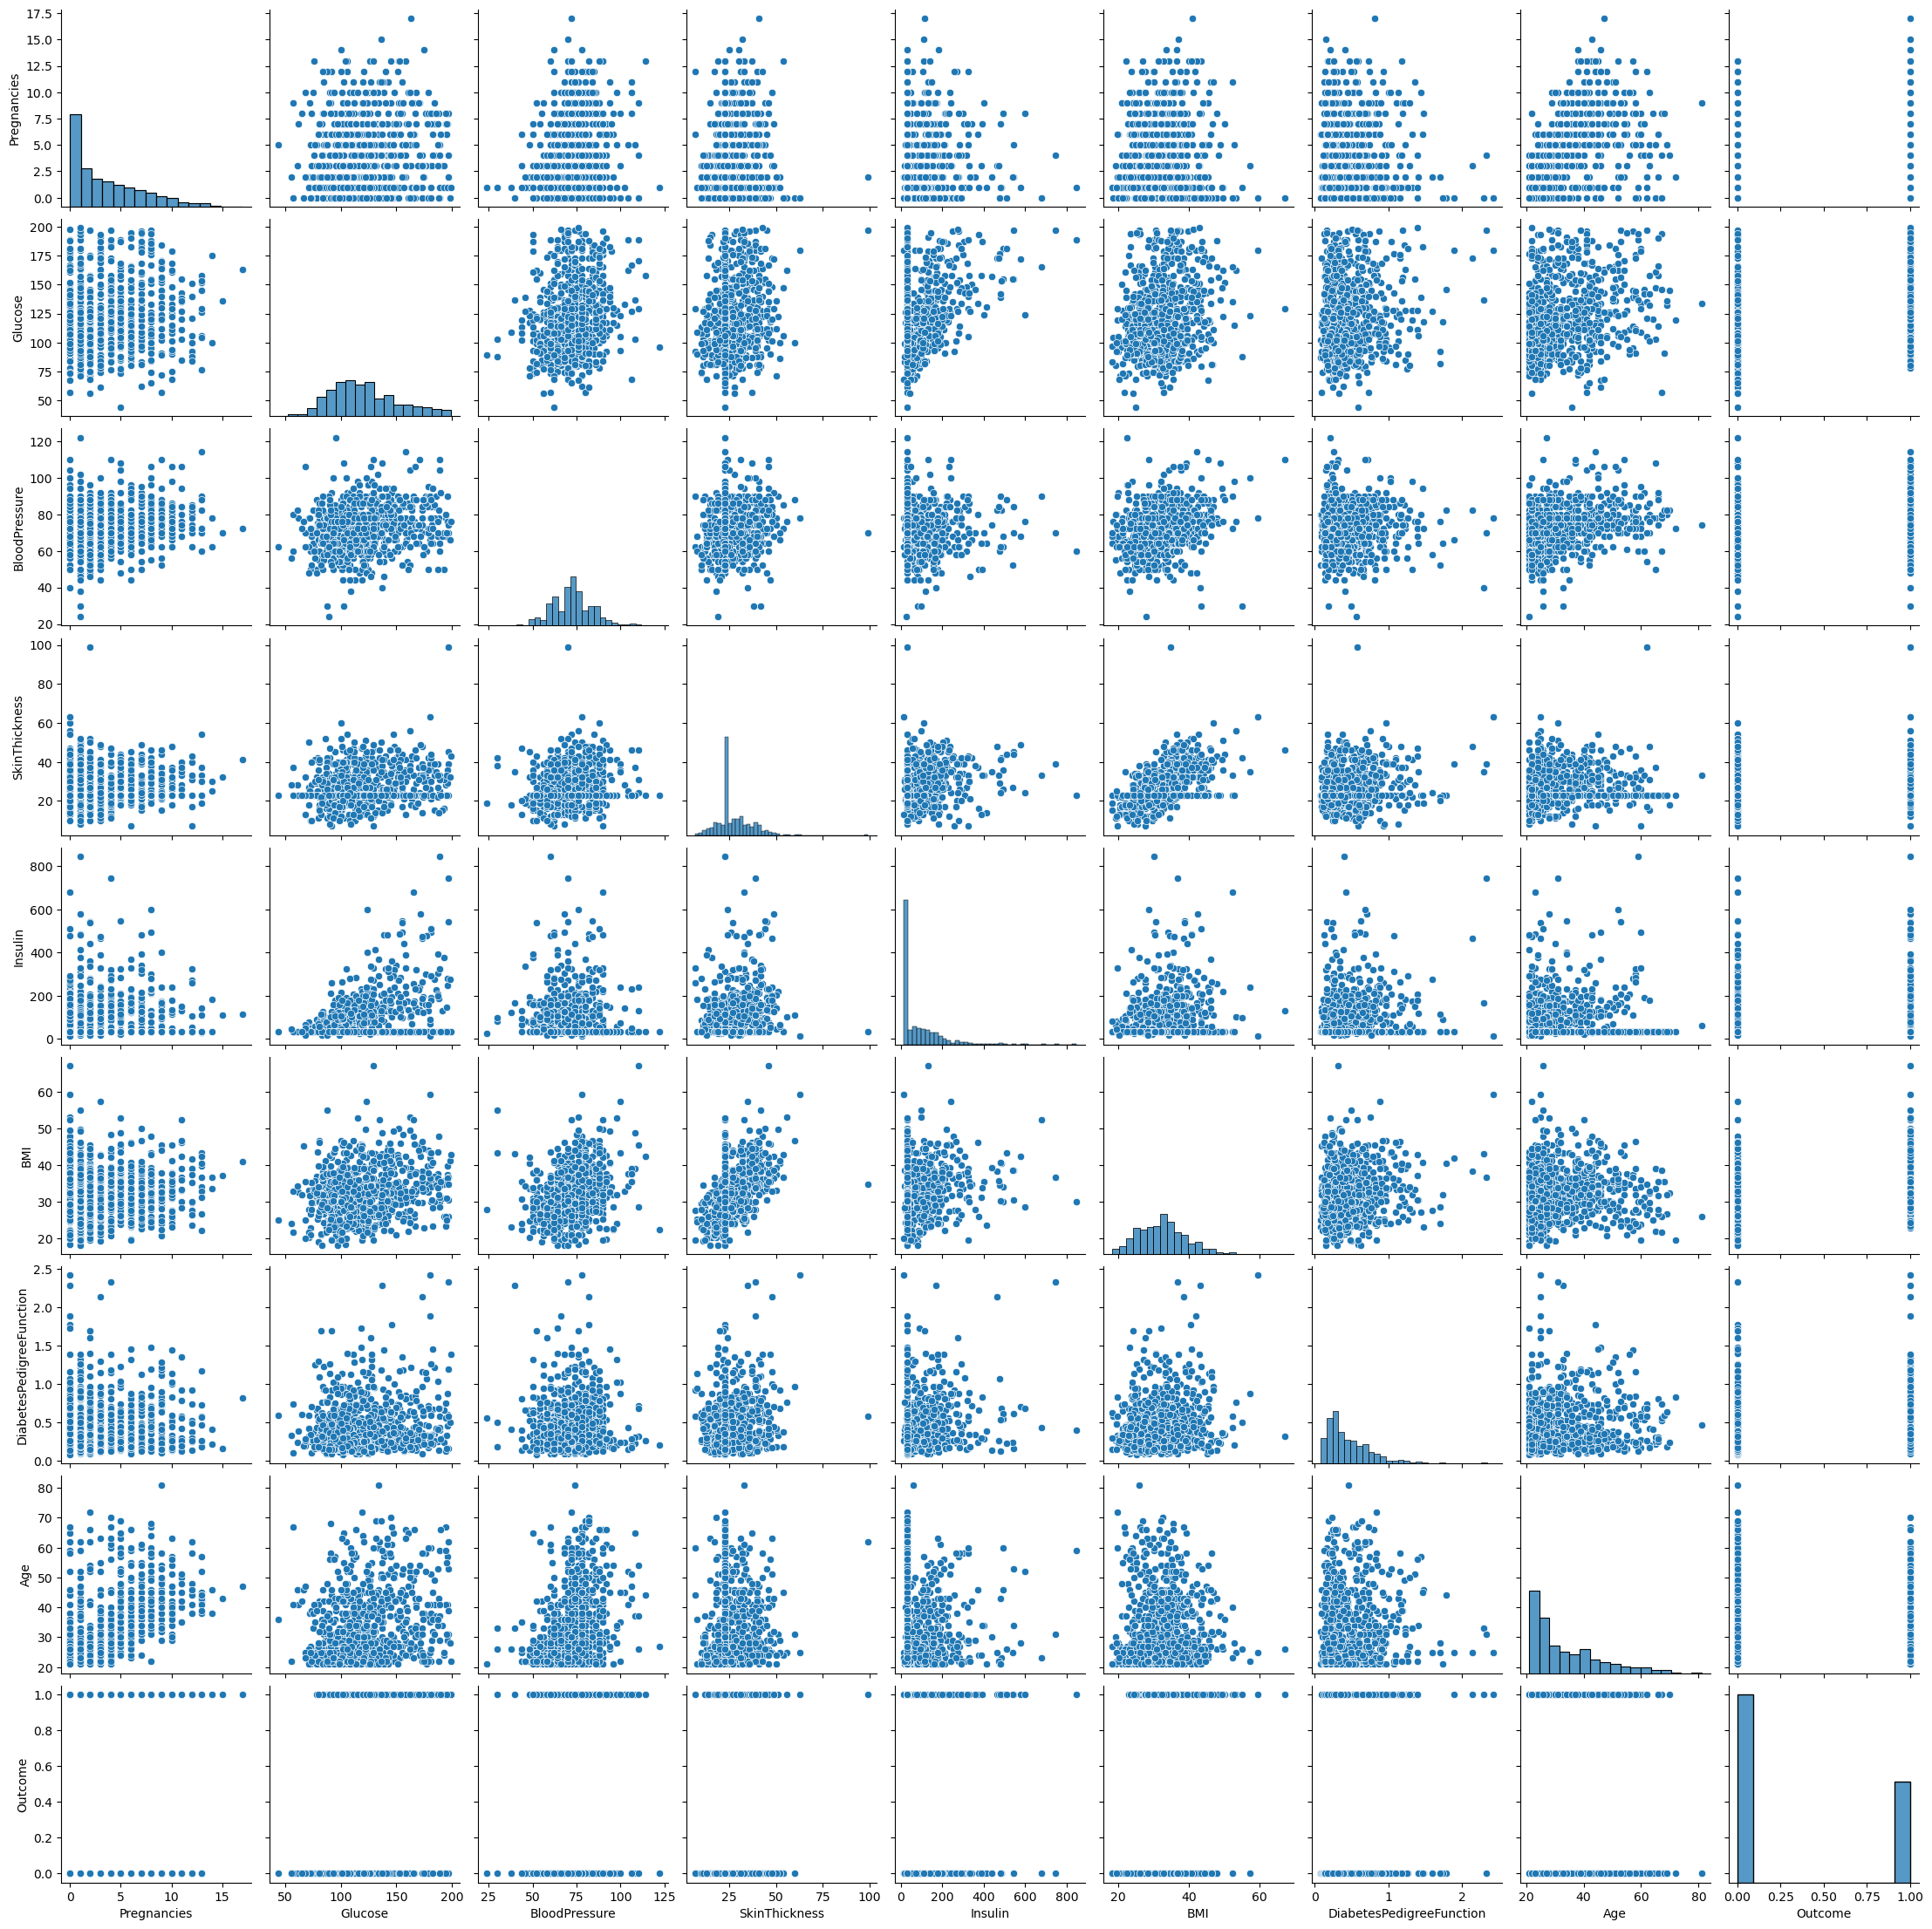

In [15]:
sns.pairplot(df)  ## show graphically behaviour with each column 

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.iloc[:,0:8]

In [19]:
y = df['Outcome'].values

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## split 80% training aand 20% testing 

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()  ## create object of standard scaler

In [66]:
x_train_scaled = scaler.fit_transform(x_train)  ## fit and transform on x_train dataset
x_test_scaled = scaler.transform(x_test)  ## only transform on x_test dataset

In [67]:
x_train_scaled  ## after scaling . show x_train_scaled

array([[-0.25604124, -0.82512519,  0.47350385, ...,  0.72502159,
        -0.70435295,  0.5687918 ],
       [ 1.53042833, -1.05234124, -0.8755976 , ..., -1.47603284,
        -0.99584617, -0.02892633],
       [ 0.04170369,  0.79784658,  0.47350385, ...,  0.90348547,
         0.1519084 ,  2.874276  ],
       ...,
       [ 0.93493847, -0.89004406, -0.70695992, ...,  0.13014202,
         0.81384094,  0.6541801 ],
       [-0.55378617, -0.63036858,  1.14805457, ...,  1.94452472,
        -1.04139199, -0.88280937],
       [-0.8515311 , -0.98742237, -1.55014832, ..., -1.07448912,
        -0.7164985 , -0.88280937]])

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()  ## create object of decision tree classifier

In [87]:
criterion =['gini','entropy']
max_depth = [1,3,5,6,7,8,9,10,12,13]
splitter=['best','random']

In [88]:
para_grid = {
    "criterion" : criterion,
    'max_depth' : max_depth,
    'splitter' : splitter
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
## create grid search cv object
grid_cv = GridSearchCV(estimator=dt,
                      param_grid=para_grid,
                      cv=5)

In [91]:
grid_cv.fit(x_train_scaled,y_train)  ## fit on grid search cv

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [92]:
grid_cv.best_score_  ## use grid search cv , show best score of the using this parameter

0.7622817539650806

In [93]:
d = grid_cv.best_params_

In [94]:
print(d)  ## show best parameter uses

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


In [97]:
## create object of decision tree classifier uses of best parameter
dt1 = DecisionTreeClassifier(criterion=d['criterion'],max_depth=d['max_depth'],splitter=d['splitter'])  

In [98]:
dt1.fit(x_train_scaled,y_train)  ## fit the model

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [104]:
from sklearn import tree

[Text(0.4735576923076923, 0.9166666666666666, 'x[1] <= 0.392\ngini = 0.449\nsamples = 614\nvalue = [405, 209]'),
 Text(0.23076923076923078, 0.75, 'x[7] <= -0.413\ngini = 0.311\nsamples = 421\nvalue = [340, 81]'),
 Text(0.35216346153846156, 0.8333333333333333, 'True  '),
 Text(0.10576923076923077, 0.5833333333333334, 'x[5] <= -0.219\ngini = 0.159\nsamples = 229\nvalue = [209, 20]'),
 Text(0.057692307692307696, 0.4166666666666667, 'x[0] <= 0.935\ngini = 0.033\nsamples = 119\nvalue = [117, 2]'),
 Text(0.038461538461538464, 0.25, 'x[1] <= 0.23\ngini = 0.017\nsamples = 118\nvalue = [117, 1]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.0\nsamples = 113\nvalue = [113, 0]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[5] <= 1.93\ngini = 0.274\nsamples = 110\nvalue = [92, 18]'),
 Text(0.11538461538461539

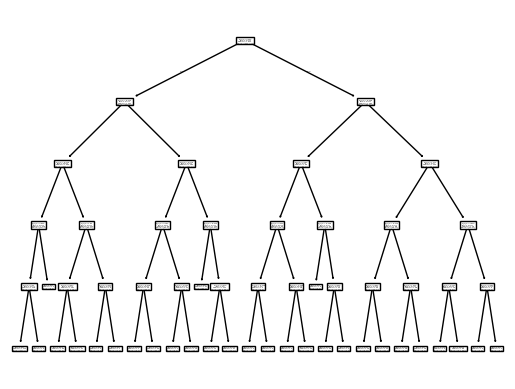

In [105]:
tree.plot_tree(dt1)  ## plot tree

In [99]:
y_pred = dt1.predict(x_test_scaled)   ## predict the model

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
accuracy_score(y_test,y_pred)  ## check accuracy score of this model

0.7272727272727273

[[84 11]
 [31 28]]


Text(50.722222222222214, 0.5, 'Actual Values')

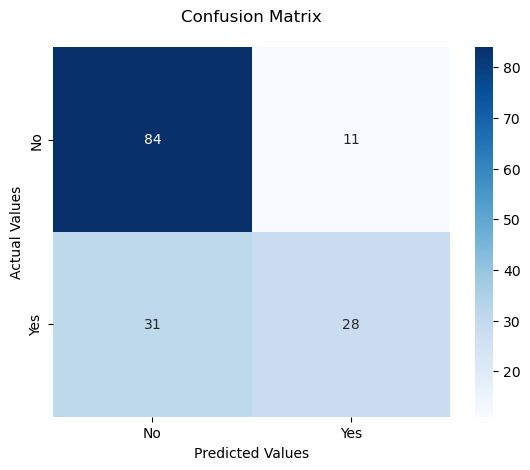

In [102]:
## show confusion matrix of this model

cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [103]:
print(classification_report(y_test,y_pred))  ## show classification report of this model

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        95
           1       0.72      0.47      0.57        59

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.73      0.71       154



In [106]:
dt1.feature_importances_

array([0.01332792, 0.51931571, 0.02751141, 0.0204472 , 0.03493857,
       0.16111793, 0.06519715, 0.15814411])

In [ ]:
'''
Model Interpretation :
                1. Accuracy Interpretation:
                        Accuracy = 73%
                        Although accuracy looks reasonable,
                        it is misleading due to class imbalance and poor recall for diabetics.
                2. Classification Report Interpretation:
                        Class 0 (Non-Diabetic):
                            Precision = 0.73
                                When the model predicts non-diabetic, it is correct 73% of the time.
                            Recall = 0.88
                                88% of actual non-diabetic patients are correctly detected.
                            F1-score = 0.80
                                Strong overall performance for class 0.
                             Model performs well for non-diabetic cases.
                        Class 1 (Diabetic):
                            Precision = 0.72
                                72% of predicted diabetic cases are actually diabetic.
                            Recall = 0.47
                                Only 47% of diabetic patients are detected.
                            F1-score = 0.57
                                Indicates weak performance for diabetic detection.
                            Model misses more than half of diabetic patients.
                3. Macro vs Weighted Average:
                            Macro Avg Recall = 0.68
                                Shows imbalance in class-wise performance.
                            Weighted Avg F1 = 0.71
                                Overall moderate performance, influenced by majority class (non-diabetic).
                4. Strengths of the Model:
                            Easy to interpret and visualize (Decision Tree).
                            Good performance for non-diabetic class.
                            Proper preprocessing improved stability.
                            No assumption of linearity.
                5.Weaknesses of the Model:
                            Low recall for diabetic patients (0.47).
                            High number of false negatives, which is dangerous in healthcare.
                            Possible overfitting if tree is not pruned.
                            Accuracy alone is not sufficient for evaluation.
                

'''

In [ ]:
'''

Conclusion:
        1. The Decision Tree model achieved 73% accuracy, indicating moderate performance.
        2. The model is biased towards the non-diabetic class.
        3.It performs well in identifying non-diabetic patients but fails to detect many diabetic cases.
        4.High false negatives make the model less reliable for medical diagnosis.
        5.Recall for diabetic patients should be improved before real-world use.
        6.Techniques such as class balancing, pruning, Random Forest, or boosting models may improve performance.
        7.Overall, the model is acceptable for learning purposes but not suitable for clinical decision-making without improvement.

'''